Generating Fractal..


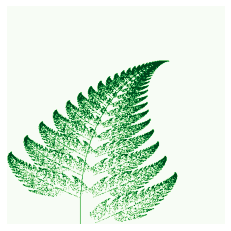

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from random import randint

def map_to_pixels(x,y,x_range=[-2.2,2.7],y_range=[0,10],x_req_range=[0,300],y_req_range=[0,300]):
    x_span = x_range[1]-x_range[0]
    x_req_span = x_req_range[1]-x_req_range[0]
    x_scaled = (x-x_range[0])/(x_span)
    px = x_req_range[0]+(x_scaled*x_req_span)

    y_span = y_range[1] - y_range[0]
    y_req_span = y_req_range[1] - y_req_range[0]
    y_scaled = (y - y_range[0]) / (y_span)
    py = y_req_range[0] + (y_scaled * y_req_span)

    return int(px),int(py)

def calc(a, m, e):
    result = np.zeros((len(a),len(m[0])))
    for i in range(len(a)):
        for j in range(len(m[0])):
            for k in range(len(m)):
                result[i][j] += a[i][k]*m[k][j]
    result = result+e
    #print(result)
    return result[0][0], result[1][0]

def fern(width=400,height=400):
    img = np.zeros((width,height))
    x = []
    y = []
    count = 0
    x.append(0)
    y.append(0)
    for i in range(1,50000):
        p = randint(1,100)
        if(p==1):
            X,Y = calc(a = [[0,0],[0,0.16]], m = [[x[count]],[y[count]]],e = [[0],[0]])
            x.append(X)
            y.append(Y)
            px,py = map_to_pixels(X,Y)
            img[px,py] = 1
        if(p>=2 and p<=86):
            X,Y = calc(a = [[0.85,0.04],[-0.04,0.85]],m = [[x[count]],[y[count]]],e = [[0],[1.60]])
            x.append(X)
            y.append(Y)
            px, py = map_to_pixels(X,Y)
            img[px,py] = 1
        if (p >= 87 and p <= 93):
            X, Y = calc(a=[[0.20, -0.26], [0.23, 0.22]], m = [[x[count]], [y[count]]], e=[[0], [1.60]])
            x.append(X)
            y.append(Y)
            px, py = map_to_pixels(X, Y)
            img[px, py] = 1
        if (p >= 94 and p <= 100):
            X, Y = calc(a=[[-0.15, 0.28], [0.26, 0.24]], m = [[x[count]], [y[count]]], e=[[0.44], [0.07]])
            x.append(X)
            y.append(Y)
            px, py = map_to_pixels(X, Y)
            img[px, py] = 1
        count += 1
        
    print("Generating Fractal..")
    plt.imshow(np.flipud(img.T),cmap= cm.Greens)
    plt.axis('off')
    plt.show()
fern(400,400)